In [2]:
from diambra.arena.stable_baselines3.make_sb3_env import make_sb3_env, EnvironmentSettings, WrappersSettings
from stable_baselines3 import DQN
from stable_baselines3.common.evaluation import evaluate_policy
from diambra.arena import SpaceTypes, Roles, EnvironmentSettings
import wandb
from wandb.integration.sb3 import WandbCallback
import os
os.environ["DIAMBRAROMSPATH"] = os.getcwd() 
os.environ["DIAMBRA_ENVS"] =  " ".join([f"""127.0.0.1:{50051 + i}""" for i in range(1)])
# Settings
settings = EnvironmentSettings()
settings.frame_shape = (60, 60, 0)
settings.characters = ("Ken")
settings.action_space = SpaceTypes.DISCRETE
settings.role = Roles.P1
settings.continue_game = 0.0

# Wrappers Settings
wrappers_settings = WrappersSettings()
wrappers_settings.normalize_reward = True
wrappers_settings.stack_frames = 3
wrappers_settings.add_last_action = True
wrappers_settings.stack_actions = 6
wrappers_settings.scale = True
wrappers_settings.exclude_image_scaling = True
wrappers_settings.role_relative = True
wrappers_settings.flatten = True
wrappers_settings.filter_keys = ["action", "own_health", "opp_health", "own_side", "opp_side", "opp_character", "stage", "timer"]

# Wandb configuration
config = {
    "algorithm": "DQN",
    "policy": "MultiInputPolicy",
    "total_timesteps": 1000000,
    "environment": "diambra-arena-sb3",
    'Frame Size': "60, 60, 0"
}
# Create environment
env, num_envs = make_sb3_env("sfiii3n", settings, wrappers_settings, render_mode='human')
print("Activated {} environment(s)".format(num_envs))

# Instantiate the agent
#agent = DQN("MultiInputPolicy", env, verbose=1, buffer_size=50000, batch_size=32)
#print("Reward: {} (avg) ± {} (std)".format(mean_reward, std_reward))
agent = DQN.load("dqn_sfiii3n", env=env)
# Run trained agent
observation = env.reset()
cumulative_reward = 0
while True:
    env.render()
    action, _state = agent.predict(observation, deterministic=True)
    observation, reward, done, info = env.step(action)
    cumulative_reward += reward
    if (reward != 0):
        print("Cumulative reward =", cumulative_reward)
    if done:
        observation = env.reset()
        break


INFO:diambra.arena.engine.interface:Trying to connect to DIAMBRA Engine server (timeout=600s)...
INFO:diambra.arena.engine.interface:... done.
INFO:diambra.arena.arena_gym:EnvironmentSettings(game_id='sfiii3n', frame_shape=(60, 60, 0), step_ratio=6, disable_keyboard=True, disable_joystick=True, render_mode='human', splash_screen=True, rank=0, env_address='127.0.0.1:50051', grpc_timeout=600, seed=1733752834, difficulty=None, continue_game=0.0, show_final=False, tower=3, _last_seed=1733752834, pb_model=game_id: "sfiii3n"
frame_shape {
  h: 60
  w: 60
}
step_ratio: 6
n_players: 1
disable_keyboard: true
disable_joystick: true
action_spaces: DISCRETE
episode_settings {
}
, n_players=1, action_space=1, role=2, characters='Ken', outfits=1, super_art=None, fighting_style=None, ultimate_style=None, speed_mode=None)


Activated 1 environment(s)
Wrapping the env in a VecTransposeImage.
Cumulative reward = [0.2857143]
Cumulative reward = [0.49689442]
Cumulative reward = [0.78260875]
Cumulative reward = [0.99378884]
Cumulative reward = [1.3540373]
Cumulative reward = [1.6397516]
Cumulative reward = [1.8881987]
Cumulative reward = [2.]
Cumulative reward = [1.826087]
Cumulative reward = [2.1118014]
Cumulative reward = [2.3229816]
Cumulative reward = [2.608696]
Cumulative reward = [2.8944104]
Cumulative reward = [3.1801248]
Cumulative reward = [3.4658391]
Cumulative reward = [3.7763982]
Cumulative reward = [3.8260877]
Cumulative reward = [4.149069]
Cumulative reward = [4.47205]
Cumulative reward = [4.6583858]
Cumulative reward = [4.6211185]
Cumulative reward = [4.360249]
Cumulative reward = [4.26087]
Cumulative reward = [4.4472055]
Cumulative reward = [4.422361]
Cumulative reward = [4.3975163]
Cumulative reward = [4.6583858]
Cumulative reward = [4.7826095]
Cumulative reward = [4.559007]
Cumulative reward 

In [4]:
from tqdm.autonotebook import tqdm
class CallbackHelper:
    def __init__(self, total) -> None:
        self.total = 0
        self.stage = 0
        self.returns = [[] for i in range(10)]
        self.pbar = tqdm(total=total) 
    def evaluate_callback(self, l, g):
        reward = l["reward"]
        d = l["done"]
        obs = l["observations"]
        
        self.total += reward
        cur_stage = int(round(9*obs['stage'].item()))
        if d or int(cur_stage) != self.stage:
            self.returns[self.stage].append(self.total)
            print(self.returns)
            self.total = 0
            if d:
                self.pbar.update(1)
                self.stage = 0
            else:
                self.stage = cur_stage
def evaluate_agent(env, agent, total, render=False):
    env.reset()
    h = CallbackHelper(total=total)
    stats = evaluate_policy(agent, 
                    env,
                    callback = h.evaluate_callback,
                    n_eval_episodes=total, 
                    deterministic=True, render=render)
    return stats, h
evaluate_agent(env, agent, total=64, render=True)

[[2.4472049698233604], [], [], [], [], [], [], [], [], []]
[[2.4472049698233604], [3.3540373146533966], [], [], [], [], [], [], [], []]
[[2.4472049698233604], [3.3540373146533966], [2.559006191790104], [], [], [], [], [], [], []]
[[2.4472049698233604], [3.3540373146533966], [2.559006191790104], [3.453416146337986], [], [], [], [], [], []]
[[2.4472049698233604], [3.3540373146533966], [2.559006191790104], [3.453416146337986], [0.5590061768889427], [], [], [], [], []]


[[2.4472049698233604], [3.3540373146533966], [2.559006191790104], [3.453416146337986], [0.5590061768889427], [-1.006211169064045], [], [], [], []]
[[2.4472049698233604, 3.2422360256314278], [3.3540373146533966], [2.559006191790104], [3.453416146337986], [0.5590061768889427], [-1.006211169064045], [], [], [], []]


[[2.4472049698233604, 3.2422360256314278], [3.3540373146533966, -0.4968944489955902], [2.559006191790104], [3.453416146337986], [0.5590061768889427], [-1.006211169064045], [], [], [], []]
[[2.4472049698233604, 3.2422360256314278, 3.5776397585868835], [3.3540373146533966, -0.4968944489955902], [2.559006191790104], [3.453416146337986], [0.5590061768889427], [-1.006211169064045], [], [], [], []]
[[2.4472049698233604, 3.2422360256314278, 3.5776397585868835], [3.3540373146533966, -0.4968944489955902, 3.0559007078409195], [2.559006191790104], [3.453416146337986], [0.5590061768889427], [-1.006211169064045], [], [], [], []]
[[2.4472049698233604, 3.2422360256314278, 3.5776397585868835], [3.3540373146533966, -0.4968944489955902, 3.0559007078409195], [2.559006191790104, 2.4099379032850266], [3.453416146337986], [0.5590061768889427], [-1.006211169064045], [], [], [], []]
[[2.4472049698233604, 3.2422360256314278, 3.5776397585868835], [3.3540373146533966, -0.4968944489955902, 3.0559007078409195], [2

[[2.4472049698233604, 3.2422360256314278, 3.5776397585868835], [3.3540373146533966, -0.4968944489955902, 3.0559007078409195], [2.559006191790104, 2.4099379032850266], [3.453416146337986, 1.9503106102347374], [0.5590061768889427, 2.571428522467613], [-1.006211169064045, -3.763975150883198], [], [], [], []]
[[2.4472049698233604, 3.2422360256314278, 3.5776397585868835, 2.0000000596046448], [3.3540373146533966, -0.4968944489955902, 3.0559007078409195], [2.559006191790104, 2.4099379032850266], [3.453416146337986, 1.9503106102347374], [0.5590061768889427, 2.571428522467613], [-1.006211169064045, -3.763975150883198], [], [], [], []]
[[2.4472049698233604, 3.2422360256314278, 3.5776397585868835, 2.0000000596046448], [3.3540373146533966, -0.4968944489955902, 3.0559007078409195, 1.4782608896493912], [2.559006191790104, 2.4099379032850266], [3.453416146337986, 1.9503106102347374], [0.5590061768889427, 2.571428522467613], [-1.006211169064045, -3.763975150883198], [], [], [], []]
[[2.447204969823360

[[2.4472049698233604, 3.2422360256314278, 3.5776397585868835, 2.0000000596046448], [3.3540373146533966, -0.4968944489955902, 3.0559007078409195, 1.4782608896493912], [2.559006191790104, 2.4099379032850266, 1.6397515162825584], [3.453416146337986, 1.9503106102347374, -1.018633484840393], [0.5590061768889427, 2.571428522467613], [-1.006211169064045, -3.763975150883198], [], [], [], []]
[[2.4472049698233604, 3.2422360256314278, 3.5776397585868835, 2.0000000596046448, 3.0559005960822105], [3.3540373146533966, -0.4968944489955902, 3.0559007078409195, 1.4782608896493912], [2.559006191790104, 2.4099379032850266, 1.6397515162825584], [3.453416146337986, 1.9503106102347374, -1.018633484840393], [0.5590061768889427, 2.571428522467613], [-1.006211169064045, -3.763975150883198], [], [], [], []]


[[2.4472049698233604, 3.2422360256314278, 3.5776397585868835, 2.0000000596046448, 3.0559005960822105], [3.3540373146533966, -0.4968944489955902, 3.0559007078409195, 1.4782608896493912, -1.2795031815767288], [2.559006191790104, 2.4099379032850266, 1.6397515162825584], [3.453416146337986, 1.9503106102347374, -1.018633484840393], [0.5590061768889427, 2.571428522467613], [-1.006211169064045, -3.763975150883198], [], [], [], []]
[[2.4472049698233604, 3.2422360256314278, 3.5776397585868835, 2.0000000596046448, 3.0559005960822105, 2.8074535205960274], [3.3540373146533966, -0.4968944489955902, 3.0559007078409195, 1.4782608896493912, -1.2795031815767288], [2.559006191790104, 2.4099379032850266, 1.6397515162825584], [3.453416146337986, 1.9503106102347374, -1.018633484840393], [0.5590061768889427, 2.571428522467613], [-1.006211169064045, -3.763975150883198], [], [], [], []]
[[2.4472049698233604, 3.2422360256314278, 3.5776397585868835, 2.0000000596046448, 3.0559005960822105, 2.8074535205960274], [

[[2.4472049698233604, 3.2422360256314278, 3.5776397585868835, 2.0000000596046448, 3.0559005960822105, 2.8074535205960274], [3.3540373146533966, -0.4968944489955902, 3.0559007078409195, 1.4782608896493912, -1.2795031815767288, 1.7639751508831978], [2.559006191790104, 2.4099379032850266, 1.6397515162825584, 2.894409790635109], [3.453416146337986, 1.9503106102347374, -1.018633484840393, 1.8881987482309341], [0.5590061768889427, 2.571428522467613, -0.8074534609913826], [-1.006211169064045, -3.763975150883198], [], [], [], []]
[[2.4472049698233604, 3.2422360256314278, 3.5776397585868835, 2.0000000596046448, 3.0559005960822105, 2.8074535205960274, 1.440993770956993], [3.3540373146533966, -0.4968944489955902, 3.0559007078409195, 1.4782608896493912, -1.2795031815767288, 1.7639751508831978], [2.559006191790104, 2.4099379032850266, 1.6397515162825584, 2.894409790635109], [3.453416146337986, 1.9503106102347374, -1.018633484840393, 1.8881987482309341], [0.5590061768889427, 2.571428522467613, -0.80

[[2.4472049698233604, 3.2422360256314278, 3.5776397585868835, 2.0000000596046448, 3.0559005960822105, 2.8074535205960274, 1.440993770956993], [3.3540373146533966, -0.4968944489955902, 3.0559007078409195, 1.4782608896493912, -1.2795031815767288, 1.7639751508831978, 1.8136646300554276], [2.559006191790104, 2.4099379032850266, 1.6397515162825584, 2.894409790635109, 2.6832298412919044], [3.453416146337986, 1.9503106102347374, -1.018633484840393, 1.8881987482309341, 2.5465837568044662], [0.5590061768889427, 2.571428522467613, -0.8074534609913826, -2.7080745324492455], [-1.006211169064045, -3.763975150883198], [], [], [], []]
[[2.4472049698233604, 3.2422360256314278, 3.5776397585868835, 2.0000000596046448, 3.0559005960822105, 2.8074535205960274, 1.440993770956993, 2.906832255423069], [3.3540373146533966, -0.4968944489955902, 3.0559007078409195, 1.4782608896493912, -1.2795031815767288, 1.7639751508831978, 1.8136646300554276], [2.559006191790104, 2.4099379032850266, 1.6397515162825584, 2.89440

[[2.4472049698233604, 3.2422360256314278, 3.5776397585868835, 2.0000000596046448, 3.0559005960822105, 2.8074535205960274, 1.440993770956993, 2.906832255423069], [3.3540373146533966, -0.4968944489955902, 3.0559007078409195, 1.4782608896493912, -1.2795031815767288, 1.7639751508831978, 1.8136646300554276, 3.09316772967577], [2.559006191790104, 2.4099379032850266, 1.6397515162825584, 2.894409790635109, 2.6832298412919044, 2.3478261157870293], [3.453416146337986, 1.9503106102347374, -1.018633484840393, 1.8881987482309341, 2.5465837568044662, 0.5714284628629684], [0.5590061768889427, 2.571428522467613, -0.8074534609913826, -2.7080745324492455, -0.36024852842092514], [-1.006211169064045, -3.763975150883198], [], [], [], []]
[[2.4472049698233604, 3.2422360256314278, 3.5776397585868835, 2.0000000596046448, 3.0559005960822105, 2.8074535205960274, 1.440993770956993, 2.906832255423069, 3.366459608078003], [3.3540373146533966, -0.4968944489955902, 3.0559007078409195, 1.4782608896493912, -1.27950318

[[2.4472049698233604, 3.2422360256314278, 3.5776397585868835, 2.0000000596046448, 3.0559005960822105, 2.8074535205960274, 1.440993770956993, 2.906832255423069, 3.366459608078003], [3.3540373146533966, -0.4968944489955902, 3.0559007078409195, 1.4782608896493912, -1.2795031815767288, 1.7639751508831978, 1.8136646300554276, 3.09316772967577, 1.565217338502407], [2.559006191790104, 2.4099379032850266, 1.6397515162825584, 2.894409790635109, 2.6832298412919044, 2.3478261157870293, 2.9689440578222275], [3.453416146337986, 1.9503106102347374, -1.018633484840393, 1.8881987482309341, 2.5465837568044662, 0.5714284628629684, -2.3354037702083588], [0.5590061768889427, 2.571428522467613, -0.8074534609913826, -2.7080745324492455, -0.36024852842092514], [-1.006211169064045, -3.763975150883198], [], [], [], []]
[[2.4472049698233604, 3.2422360256314278, 3.5776397585868835, 2.0000000596046448, 3.0559005960822105, 2.8074535205960274, 1.440993770956993, 2.906832255423069, 3.366459608078003, 1.6770186945796

[[2.4472049698233604, 3.2422360256314278, 3.5776397585868835, 2.0000000596046448, 3.0559005960822105, 2.8074535205960274, 1.440993770956993, 2.906832255423069, 3.366459608078003, 1.6770186945796013], [3.3540373146533966, -0.4968944489955902, 3.0559007078409195, 1.4782608896493912, -1.2795031815767288, 1.7639751508831978, 1.8136646300554276, 3.09316772967577, 1.565217338502407, 3.0310559198260307], [2.559006191790104, 2.4099379032850266, 1.6397515162825584, 2.894409790635109, 2.6832298412919044, 2.3478261157870293, 2.9689440578222275, 0.645962618291378], [3.453416146337986, 1.9503106102347374, -1.018633484840393, 1.8881987482309341, 2.5465837568044662, 0.5714284628629684, -2.3354037702083588, -0.21118012070655823], [0.5590061768889427, 2.571428522467613, -0.8074534609913826, -2.7080745324492455, -0.36024852842092514], [-1.006211169064045, -3.763975150883198], [], [], [], []]
[[2.4472049698233604, 3.2422360256314278, 3.5776397585868835, 2.0000000596046448, 3.0559005960822105, 2.807453520

[[2.4472049698233604, 3.2422360256314278, 3.5776397585868835, 2.0000000596046448, 3.0559005960822105, 2.8074535205960274, 1.440993770956993, 2.906832255423069, 3.366459608078003, 1.6770186945796013, 2.832298196852207], [3.3540373146533966, -0.4968944489955902, 3.0559007078409195, 1.4782608896493912, -1.2795031815767288, 1.7639751508831978, 1.8136646300554276, 3.09316772967577, 1.565217338502407, 3.0310559198260307, 2.0248447731137276], [2.559006191790104, 2.4099379032850266, 1.6397515162825584, 2.894409790635109, 2.6832298412919044, 2.3478261157870293, 2.9689440578222275, 0.645962618291378, 2.546583890914917], [3.453416146337986, 1.9503106102347374, -1.018633484840393, 1.8881987482309341, 2.5465837568044662, 0.5714284628629684, -2.3354037702083588, -0.21118012070655823, 2.5465839207172394], [0.5590061768889427, 2.571428522467613, -0.8074534609913826, -2.7080745324492455, -0.36024852842092514, 1.1677018478512764], [-1.006211169064045, -3.763975150883198, 0.3229813650250435], [-3.9130435

[[2.4472049698233604, 3.2422360256314278, 3.5776397585868835, 2.0000000596046448, 3.0559005960822105, 2.8074535205960274, 1.440993770956993, 2.906832255423069, 3.366459608078003, 1.6770186945796013, 2.832298196852207, 2.0124223604798317], [3.3540373146533966, -0.4968944489955902, 3.0559007078409195, 1.4782608896493912, -1.2795031815767288, 1.7639751508831978, 1.8136646300554276, 3.09316772967577, 1.565217338502407, 3.0310559198260307, 2.0248447731137276, 3.627329245209694], [2.559006191790104, 2.4099379032850266, 1.6397515162825584, 2.894409790635109, 2.6832298412919044, 2.3478261157870293, 2.9689440578222275, 0.645962618291378, 2.546583890914917, 1.0807452946901321], [3.453416146337986, 1.9503106102347374, -1.018633484840393, 1.8881987482309341, 2.5465837568044662, 0.5714284628629684, -2.3354037702083588, -0.21118012070655823, 2.5465839207172394, 0.6335402950644493], [0.5590061768889427, 2.571428522467613, -0.8074534609913826, -2.7080745324492455, -0.36024852842092514, 1.1677018478512

[[2.4472049698233604, 3.2422360256314278, 3.5776397585868835, 2.0000000596046448, 3.0559005960822105, 2.8074535205960274, 1.440993770956993, 2.906832255423069, 3.366459608078003, 1.6770186945796013, 2.832298196852207, 2.0124223604798317, 2.9192546904087067], [3.3540373146533966, -0.4968944489955902, 3.0559007078409195, 1.4782608896493912, -1.2795031815767288, 1.7639751508831978, 1.8136646300554276, 3.09316772967577, 1.565217338502407, 3.0310559198260307, 2.0248447731137276, 3.627329245209694, 2.7204968631267548], [2.559006191790104, 2.4099379032850266, 1.6397515162825584, 2.894409790635109, 2.6832298412919044, 2.3478261157870293, 2.9689440578222275, 0.645962618291378, 2.546583890914917, 1.0807452946901321, 2.248447209596634], [3.453416146337986, 1.9503106102347374, -1.018633484840393, 1.8881987482309341, 2.5465837568044662, 0.5714284628629684, -2.3354037702083588, -0.21118012070655823, 2.5465839207172394, 0.6335402950644493, 0.40993782132864], [0.5590061768889427, 2.571428522467613, -0

[[2.4472049698233604, 3.2422360256314278, 3.5776397585868835, 2.0000000596046448, 3.0559005960822105, 2.8074535205960274, 1.440993770956993, 2.906832255423069, 3.366459608078003, 1.6770186945796013, 2.832298196852207, 2.0124223604798317, 2.9192546904087067, 2.732919231057167], [3.3540373146533966, -0.4968944489955902, 3.0559007078409195, 1.4782608896493912, -1.2795031815767288, 1.7639751508831978, 1.8136646300554276, 3.09316772967577, 1.565217338502407, 3.0310559198260307, 2.0248447731137276, 3.627329245209694, 2.7204968631267548, 2.732919231057167], [2.559006191790104, 2.4099379032850266, 1.6397515162825584, 2.894409790635109, 2.6832298412919044, 2.3478261157870293, 2.9689440578222275, 0.645962618291378, 2.546583890914917, 1.0807452946901321, 2.248447209596634, 2.024844780564308], [3.453416146337986, 1.9503106102347374, -1.018633484840393, 1.8881987482309341, 2.5465837568044662, 0.5714284628629684, -2.3354037702083588, -0.21118012070655823, 2.5465839207172394, 0.6335402950644493, 0.40

[[2.4472049698233604, 3.2422360256314278, 3.5776397585868835, 2.0000000596046448, 3.0559005960822105, 2.8074535205960274, 1.440993770956993, 2.906832255423069, 3.366459608078003, 1.6770186945796013, 2.832298196852207, 2.0124223604798317, 2.9192546904087067, 2.732919231057167, 3.453416161239147], [3.3540373146533966, -0.4968944489955902, 3.0559007078409195, 1.4782608896493912, -1.2795031815767288, 1.7639751508831978, 1.8136646300554276, 3.09316772967577, 1.565217338502407, 3.0310559198260307, 2.0248447731137276, 3.627329245209694, 2.7204968631267548, 2.732919231057167, 2.397515580058098], [2.559006191790104, 2.4099379032850266, 1.6397515162825584, 2.894409790635109, 2.6832298412919044, 2.3478261157870293, 2.9689440578222275, 0.645962618291378, 2.546583890914917, 1.0807452946901321, 2.248447209596634, 2.024844780564308, 0.33540377020835876], [3.453416146337986, 1.9503106102347374, -1.018633484840393, 1.8881987482309341, 2.5465837568044662, 0.5714284628629684, -2.3354037702083588, -0.2111

[[2.4472049698233604, 3.2422360256314278, 3.5776397585868835, 2.0000000596046448, 3.0559005960822105, 2.8074535205960274, 1.440993770956993, 2.906832255423069, 3.366459608078003, 1.6770186945796013, 2.832298196852207, 2.0124223604798317, 2.9192546904087067, 2.732919231057167, 3.453416161239147, 3.391304314136505], [3.3540373146533966, -0.4968944489955902, 3.0559007078409195, 1.4782608896493912, -1.2795031815767288, 1.7639751508831978, 1.8136646300554276, 3.09316772967577, 1.565217338502407, 3.0310559198260307, 2.0248447731137276, 3.627329245209694, 2.7204968631267548, 2.732919231057167, 2.397515580058098, 2.3478260189294815], [2.559006191790104, 2.4099379032850266, 1.6397515162825584, 2.894409790635109, 2.6832298412919044, 2.3478261157870293, 2.9689440578222275, 0.645962618291378, 2.546583890914917, 1.0807452946901321, 2.248447209596634, 2.024844780564308, 0.33540377020835876, 3.4534161910414696], [3.453416146337986, 1.9503106102347374, -1.018633484840393, 1.8881987482309341, 2.5465837

[[2.4472049698233604, 3.2422360256314278, 3.5776397585868835, 2.0000000596046448, 3.0559005960822105, 2.8074535205960274, 1.440993770956993, 2.906832255423069, 3.366459608078003, 1.6770186945796013, 2.832298196852207, 2.0124223604798317, 2.9192546904087067, 2.732919231057167, 3.453416161239147, 3.391304314136505, 2.5217391327023506], [3.3540373146533966, -0.4968944489955902, 3.0559007078409195, 1.4782608896493912, -1.2795031815767288, 1.7639751508831978, 1.8136646300554276, 3.09316772967577, 1.565217338502407, 3.0310559198260307, 2.0248447731137276, 3.627329245209694, 2.7204968631267548, 2.732919231057167, 2.397515580058098, 2.3478260189294815, 2.8447204902768135], [2.559006191790104, 2.4099379032850266, 1.6397515162825584, 2.894409790635109, 2.6832298412919044, 2.3478261157870293, 2.9689440578222275, 0.645962618291378, 2.546583890914917, 1.0807452946901321, 2.248447209596634, 2.024844780564308, 0.33540377020835876, 3.4534161910414696, 2.7453416287899017], [3.453416146337986, 1.9503106

[[2.4472049698233604, 3.2422360256314278, 3.5776397585868835, 2.0000000596046448, 3.0559005960822105, 2.8074535205960274, 1.440993770956993, 2.906832255423069, 3.366459608078003, 1.6770186945796013, 2.832298196852207, 2.0124223604798317, 2.9192546904087067, 2.732919231057167, 3.453416161239147, 3.391304314136505, 2.5217391327023506, 2.4968944042921066], [3.3540373146533966, -0.4968944489955902, 3.0559007078409195, 1.4782608896493912, -1.2795031815767288, 1.7639751508831978, 1.8136646300554276, 3.09316772967577, 1.565217338502407, 3.0310559198260307, 2.0248447731137276, 3.627329245209694, 2.7204968631267548, 2.732919231057167, 2.397515580058098, 2.3478260189294815, 2.8447204902768135, 2.720496892929077], [2.559006191790104, 2.4099379032850266, 1.6397515162825584, 2.894409790635109, 2.6832298412919044, 2.3478261157870293, 2.9689440578222275, 0.645962618291378, 2.546583890914917, 1.0807452946901321, 2.248447209596634, 2.024844780564308, 0.33540377020835876, 3.4534161910414696, 2.745341628

[[2.4472049698233604, 3.2422360256314278, 3.5776397585868835, 2.0000000596046448, 3.0559005960822105, 2.8074535205960274, 1.440993770956993, 2.906832255423069, 3.366459608078003, 1.6770186945796013, 2.832298196852207, 2.0124223604798317, 2.9192546904087067, 2.732919231057167, 3.453416161239147, 3.391304314136505, 2.5217391327023506, 2.4968944042921066, 3.3043478280305862], [3.3540373146533966, -0.4968944489955902, 3.0559007078409195, 1.4782608896493912, -1.2795031815767288, 1.7639751508831978, 1.8136646300554276, 3.09316772967577, 1.565217338502407, 3.0310559198260307, 2.0248447731137276, 3.627329245209694, 2.7204968631267548, 2.732919231057167, 2.397515580058098, 2.3478260189294815, 2.8447204902768135, 2.720496892929077, 1.652173861861229], [2.559006191790104, 2.4099379032850266, 1.6397515162825584, 2.894409790635109, 2.6832298412919044, 2.3478261157870293, 2.9689440578222275, 0.645962618291378, 2.546583890914917, 1.0807452946901321, 2.248447209596634, 2.024844780564308, 0.33540377020

[[2.4472049698233604, 3.2422360256314278, 3.5776397585868835, 2.0000000596046448, 3.0559005960822105, 2.8074535205960274, 1.440993770956993, 2.906832255423069, 3.366459608078003, 1.6770186945796013, 2.832298196852207, 2.0124223604798317, 2.9192546904087067, 2.732919231057167, 3.453416161239147, 3.391304314136505, 2.5217391327023506, 2.4968944042921066, 3.3043478280305862, 2.8695652931928635], [3.3540373146533966, -0.4968944489955902, 3.0559007078409195, 1.4782608896493912, -1.2795031815767288, 1.7639751508831978, 1.8136646300554276, 3.09316772967577, 1.565217338502407, 3.0310559198260307, 2.0248447731137276, 3.627329245209694, 2.7204968631267548, 2.732919231057167, 2.397515580058098, 2.3478260189294815, 2.8447204902768135, 2.720496892929077, 1.652173861861229, 3.167701795697212], [2.559006191790104, 2.4099379032850266, 1.6397515162825584, 2.894409790635109, 2.6832298412919044, 2.3478261157870293, 2.9689440578222275, 0.645962618291378, 2.546583890914917, 1.0807452946901321, 2.2484472095

[[2.4472049698233604, 3.2422360256314278, 3.5776397585868835, 2.0000000596046448, 3.0559005960822105, 2.8074535205960274, 1.440993770956993, 2.906832255423069, 3.366459608078003, 1.6770186945796013, 2.832298196852207, 2.0124223604798317, 2.9192546904087067, 2.732919231057167, 3.453416161239147, 3.391304314136505, 2.5217391327023506, 2.4968944042921066, 3.3043478280305862, 2.8695652931928635, 3.577639788389206], [3.3540373146533966, -0.4968944489955902, 3.0559007078409195, 1.4782608896493912, -1.2795031815767288, 1.7639751508831978, 1.8136646300554276, 3.09316772967577, 1.565217338502407, 3.0310559198260307, 2.0248447731137276, 3.627329245209694, 2.7204968631267548, 2.732919231057167, 2.397515580058098, 2.3478260189294815, 2.8447204902768135, 2.720496892929077, 1.652173861861229, 3.167701795697212, 2.7329192087054253], [2.559006191790104, 2.4099379032850266, 1.6397515162825584, 2.894409790635109, 2.6832298412919044, 2.3478261157870293, 2.9689440578222275, 0.645962618291378, 2.5465838909

[[2.4472049698233604, 3.2422360256314278, 3.5776397585868835, 2.0000000596046448, 3.0559005960822105, 2.8074535205960274, 1.440993770956993, 2.906832255423069, 3.366459608078003, 1.6770186945796013, 2.832298196852207, 2.0124223604798317, 2.9192546904087067, 2.732919231057167, 3.453416161239147, 3.391304314136505, 2.5217391327023506, 2.4968944042921066, 3.3043478280305862, 2.8695652931928635, 3.577639788389206, 3.291925437748432], [3.3540373146533966, -0.4968944489955902, 3.0559007078409195, 1.4782608896493912, -1.2795031815767288, 1.7639751508831978, 1.8136646300554276, 3.09316772967577, 1.565217338502407, 3.0310559198260307, 2.0248447731137276, 3.627329245209694, 2.7204968631267548, 2.732919231057167, 2.397515580058098, 2.3478260189294815, 2.8447204902768135, 2.720496892929077, 1.652173861861229, 3.167701795697212, 2.7329192087054253, 3.1925465911626816], [2.559006191790104, 2.4099379032850266, 1.6397515162825584, 2.894409790635109, 2.6832298412919044, 2.3478261157870293, 2.9689440578

[[2.4472049698233604, 3.2422360256314278, 3.5776397585868835, 2.0000000596046448, 3.0559005960822105, 2.8074535205960274, 1.440993770956993, 2.906832255423069, 3.366459608078003, 1.6770186945796013, 2.832298196852207, 2.0124223604798317, 2.9192546904087067, 2.732919231057167, 3.453416161239147, 3.391304314136505, 2.5217391327023506, 2.4968944042921066, 3.3043478280305862, 2.8695652931928635, 3.577639788389206, 3.291925437748432, 2.633540339767933], [3.3540373146533966, -0.4968944489955902, 3.0559007078409195, 1.4782608896493912, -1.2795031815767288, 1.7639751508831978, 1.8136646300554276, 3.09316772967577, 1.565217338502407, 3.0310559198260307, 2.0248447731137276, 3.627329245209694, 2.7204968631267548, 2.732919231057167, 2.397515580058098, 2.3478260189294815, 2.8447204902768135, 2.720496892929077, 1.652173861861229, 3.167701795697212, 2.7329192087054253, 3.1925465911626816, 1.6149068623781204], [2.559006191790104, 2.4099379032850266, 1.6397515162825584, 2.894409790635109, 2.68322984129

[[2.4472049698233604, 3.2422360256314278, 3.5776397585868835, 2.0000000596046448, 3.0559005960822105, 2.8074535205960274, 1.440993770956993, 2.906832255423069, 3.366459608078003, 1.6770186945796013, 2.832298196852207, 2.0124223604798317, 2.9192546904087067, 2.732919231057167, 3.453416161239147, 3.391304314136505, 2.5217391327023506, 2.4968944042921066, 3.3043478280305862, 2.8695652931928635, 3.577639788389206, 3.291925437748432, 2.633540339767933, 2.4099379405379295], [3.3540373146533966, -0.4968944489955902, 3.0559007078409195, 1.4782608896493912, -1.2795031815767288, 1.7639751508831978, 1.8136646300554276, 3.09316772967577, 1.565217338502407, 3.0310559198260307, 2.0248447731137276, 3.627329245209694, 2.7204968631267548, 2.732919231057167, 2.397515580058098, 2.3478260189294815, 2.8447204902768135, 2.720496892929077, 1.652173861861229, 3.167701795697212, 2.7329192087054253, 3.1925465911626816, 1.6149068623781204, 3.751552887260914], [2.559006191790104, 2.4099379032850266, 1.63975151628

[[2.4472049698233604, 3.2422360256314278, 3.5776397585868835, 2.0000000596046448, 3.0559005960822105, 2.8074535205960274, 1.440993770956993, 2.906832255423069, 3.366459608078003, 1.6770186945796013, 2.832298196852207, 2.0124223604798317, 2.9192546904087067, 2.732919231057167, 3.453416161239147, 3.391304314136505, 2.5217391327023506, 2.4968944042921066, 3.3043478280305862, 2.8695652931928635, 3.577639788389206, 3.291925437748432, 2.633540339767933, 2.4099379405379295, 3.5279503911733627], [3.3540373146533966, -0.4968944489955902, 3.0559007078409195, 1.4782608896493912, -1.2795031815767288, 1.7639751508831978, 1.8136646300554276, 3.09316772967577, 1.565217338502407, 3.0310559198260307, 2.0248447731137276, 3.627329245209694, 2.7204968631267548, 2.732919231057167, 2.397515580058098, 2.3478260189294815, 2.8447204902768135, 2.720496892929077, 1.652173861861229, 3.167701795697212, 2.7329192087054253, 3.1925465911626816, 1.6149068623781204, 3.751552887260914, 2.4720496833324432], [2.5590061917

[[2.4472049698233604, 3.2422360256314278, 3.5776397585868835, 2.0000000596046448, 3.0559005960822105, 2.8074535205960274, 1.440993770956993, 2.906832255423069, 3.366459608078003, 1.6770186945796013, 2.832298196852207, 2.0124223604798317, 2.9192546904087067, 2.732919231057167, 3.453416161239147, 3.391304314136505, 2.5217391327023506, 2.4968944042921066, 3.3043478280305862, 2.8695652931928635, 3.577639788389206, 3.291925437748432, 2.633540339767933, 2.4099379405379295, 3.5279503911733627, 3.6024844720959663], [3.3540373146533966, -0.4968944489955902, 3.0559007078409195, 1.4782608896493912, -1.2795031815767288, 1.7639751508831978, 1.8136646300554276, 3.09316772967577, 1.565217338502407, 3.0310559198260307, 2.0248447731137276, 3.627329245209694, 2.7204968631267548, 2.732919231057167, 2.397515580058098, 2.3478260189294815, 2.8447204902768135, 2.720496892929077, 1.652173861861229, 3.167701795697212, 2.7329192087054253, 3.1925465911626816, 1.6149068623781204, 3.751552887260914, 2.472049683332

[[2.4472049698233604, 3.2422360256314278, 3.5776397585868835, 2.0000000596046448, 3.0559005960822105, 2.8074535205960274, 1.440993770956993, 2.906832255423069, 3.366459608078003, 1.6770186945796013, 2.832298196852207, 2.0124223604798317, 2.9192546904087067, 2.732919231057167, 3.453416161239147, 3.391304314136505, 2.5217391327023506, 2.4968944042921066, 3.3043478280305862, 2.8695652931928635, 3.577639788389206, 3.291925437748432, 2.633540339767933, 2.4099379405379295, 3.5279503911733627, 3.6024844720959663, 2.670807473361492], [3.3540373146533966, -0.4968944489955902, 3.0559007078409195, 1.4782608896493912, -1.2795031815767288, 1.7639751508831978, 1.8136646300554276, 3.09316772967577, 1.565217338502407, 3.0310559198260307, 2.0248447731137276, 3.627329245209694, 2.7204968631267548, 2.732919231057167, 2.397515580058098, 2.3478260189294815, 2.8447204902768135, 2.720496892929077, 1.652173861861229, 3.167701795697212, 2.7329192087054253, 3.1925465911626816, 1.6149068623781204, 3.751552887260

[[2.4472049698233604, 3.2422360256314278, 3.5776397585868835, 2.0000000596046448, 3.0559005960822105, 2.8074535205960274, 1.440993770956993, 2.906832255423069, 3.366459608078003, 1.6770186945796013, 2.832298196852207, 2.0124223604798317, 2.9192546904087067, 2.732919231057167, 3.453416161239147, 3.391304314136505, 2.5217391327023506, 2.4968944042921066, 3.3043478280305862, 2.8695652931928635, 3.577639788389206, 3.291925437748432, 2.633540339767933, 2.4099379405379295, 3.5279503911733627, 3.6024844720959663, 2.670807473361492, 2.2111800760030746], [3.3540373146533966, -0.4968944489955902, 3.0559007078409195, 1.4782608896493912, -1.2795031815767288, 1.7639751508831978, 1.8136646300554276, 3.09316772967577, 1.565217338502407, 3.0310559198260307, 2.0248447731137276, 3.627329245209694, 2.7204968631267548, 2.732919231057167, 2.397515580058098, 2.3478260189294815, 2.8447204902768135, 2.720496892929077, 1.652173861861229, 3.167701795697212, 2.7329192087054253, 3.1925465911626816, 1.614906862378

[[2.4472049698233604, 3.2422360256314278, 3.5776397585868835, 2.0000000596046448, 3.0559005960822105, 2.8074535205960274, 1.440993770956993, 2.906832255423069, 3.366459608078003, 1.6770186945796013, 2.832298196852207, 2.0124223604798317, 2.9192546904087067, 2.732919231057167, 3.453416161239147, 3.391304314136505, 2.5217391327023506, 2.4968944042921066, 3.3043478280305862, 2.8695652931928635, 3.577639788389206, 3.291925437748432, 2.633540339767933, 2.4099379405379295, 3.5279503911733627, 3.6024844720959663, 2.670807473361492, 2.2111800760030746, 3.229813665151596], [3.3540373146533966, -0.4968944489955902, 3.0559007078409195, 1.4782608896493912, -1.2795031815767288, 1.7639751508831978, 1.8136646300554276, 3.09316772967577, 1.565217338502407, 3.0310559198260307, 2.0248447731137276, 3.627329245209694, 2.7204968631267548, 2.732919231057167, 2.397515580058098, 2.3478260189294815, 2.8447204902768135, 2.720496892929077, 1.652173861861229, 3.167701795697212, 2.7329192087054253, 3.1925465911626

[[2.4472049698233604, 3.2422360256314278, 3.5776397585868835, 2.0000000596046448, 3.0559005960822105, 2.8074535205960274, 1.440993770956993, 2.906832255423069, 3.366459608078003, 1.6770186945796013, 2.832298196852207, 2.0124223604798317, 2.9192546904087067, 2.732919231057167, 3.453416161239147, 3.391304314136505, 2.5217391327023506, 2.4968944042921066, 3.3043478280305862, 2.8695652931928635, 3.577639788389206, 3.291925437748432, 2.633540339767933, 2.4099379405379295, 3.5279503911733627, 3.6024844720959663, 2.670807473361492, 2.2111800760030746, 3.229813665151596, 3.639751546084881], [3.3540373146533966, -0.4968944489955902, 3.0559007078409195, 1.4782608896493912, -1.2795031815767288, 1.7639751508831978, 1.8136646300554276, 3.09316772967577, 1.565217338502407, 3.0310559198260307, 2.0248447731137276, 3.627329245209694, 2.7204968631267548, 2.732919231057167, 2.397515580058098, 2.3478260189294815, 2.8447204902768135, 2.720496892929077, 1.652173861861229, 3.167701795697212, 2.73291920870542

[[2.4472049698233604, 3.2422360256314278, 3.5776397585868835, 2.0000000596046448, 3.0559005960822105, 2.8074535205960274, 1.440993770956993, 2.906832255423069, 3.366459608078003, 1.6770186945796013, 2.832298196852207, 2.0124223604798317, 2.9192546904087067, 2.732919231057167, 3.453416161239147, 3.391304314136505, 2.5217391327023506, 2.4968944042921066, 3.3043478280305862, 2.8695652931928635, 3.577639788389206, 3.291925437748432, 2.633540339767933, 2.4099379405379295, 3.5279503911733627, 3.6024844720959663, 2.670807473361492, 2.2111800760030746, 3.229813665151596, 3.639751546084881, 2.9440994635224342], [3.3540373146533966, -0.4968944489955902, 3.0559007078409195, 1.4782608896493912, -1.2795031815767288, 1.7639751508831978, 1.8136646300554276, 3.09316772967577, 1.565217338502407, 3.0310559198260307, 2.0248447731137276, 3.627329245209694, 2.7204968631267548, 2.732919231057167, 2.397515580058098, 2.3478260189294815, 2.8447204902768135, 2.720496892929077, 1.652173861861229, 3.1677017956972

[[2.4472049698233604, 3.2422360256314278, 3.5776397585868835, 2.0000000596046448, 3.0559005960822105, 2.8074535205960274, 1.440993770956993, 2.906832255423069, 3.366459608078003, 1.6770186945796013, 2.832298196852207, 2.0124223604798317, 2.9192546904087067, 2.732919231057167, 3.453416161239147, 3.391304314136505, 2.5217391327023506, 2.4968944042921066, 3.3043478280305862, 2.8695652931928635, 3.577639788389206, 3.291925437748432, 2.633540339767933, 2.4099379405379295, 3.5279503911733627, 3.6024844720959663, 2.670807473361492, 2.2111800760030746, 3.229813665151596, 3.639751546084881, 2.9440994635224342, 2.285714313387871], [3.3540373146533966, -0.4968944489955902, 3.0559007078409195, 1.4782608896493912, -1.2795031815767288, 1.7639751508831978, 1.8136646300554276, 3.09316772967577, 1.565217338502407, 3.0310559198260307, 2.0248447731137276, 3.627329245209694, 2.7204968631267548, 2.732919231057167, 2.397515580058098, 2.3478260189294815, 2.8447204902768135, 2.720496892929077, 1.6521738618612

[[2.4472049698233604, 3.2422360256314278, 3.5776397585868835, 2.0000000596046448, 3.0559005960822105, 2.8074535205960274, 1.440993770956993, 2.906832255423069, 3.366459608078003, 1.6770186945796013, 2.832298196852207, 2.0124223604798317, 2.9192546904087067, 2.732919231057167, 3.453416161239147, 3.391304314136505, 2.5217391327023506, 2.4968944042921066, 3.3043478280305862, 2.8695652931928635, 3.577639788389206, 3.291925437748432, 2.633540339767933, 2.4099379405379295, 3.5279503911733627, 3.6024844720959663, 2.670807473361492, 2.2111800760030746, 3.229813665151596, 3.639751546084881, 2.9440994635224342, 2.285714313387871, 1.9751552119851112], [3.3540373146533966, -0.4968944489955902, 3.0559007078409195, 1.4782608896493912, -1.2795031815767288, 1.7639751508831978, 1.8136646300554276, 3.09316772967577, 1.565217338502407, 3.0310559198260307, 2.0248447731137276, 3.627329245209694, 2.7204968631267548, 2.732919231057167, 2.397515580058098, 2.3478260189294815, 2.8447204902768135, 2.720496892929

[[2.4472049698233604, 3.2422360256314278, 3.5776397585868835, 2.0000000596046448, 3.0559005960822105, 2.8074535205960274, 1.440993770956993, 2.906832255423069, 3.366459608078003, 1.6770186945796013, 2.832298196852207, 2.0124223604798317, 2.9192546904087067, 2.732919231057167, 3.453416161239147, 3.391304314136505, 2.5217391327023506, 2.4968944042921066, 3.3043478280305862, 2.8695652931928635, 3.577639788389206, 3.291925437748432, 2.633540339767933, 2.4099379405379295, 3.5279503911733627, 3.6024844720959663, 2.670807473361492, 2.2111800760030746, 3.229813665151596, 3.639751546084881, 2.9440994635224342, 2.285714313387871, 1.9751552119851112, 2.5465838611125946], [3.3540373146533966, -0.4968944489955902, 3.0559007078409195, 1.4782608896493912, -1.2795031815767288, 1.7639751508831978, 1.8136646300554276, 3.09316772967577, 1.565217338502407, 3.0310559198260307, 2.0248447731137276, 3.627329245209694, 2.7204968631267548, 2.732919231057167, 2.397515580058098, 2.3478260189294815, 2.844720490276

[[2.4472049698233604, 3.2422360256314278, 3.5776397585868835, 2.0000000596046448, 3.0559005960822105, 2.8074535205960274, 1.440993770956993, 2.906832255423069, 3.366459608078003, 1.6770186945796013, 2.832298196852207, 2.0124223604798317, 2.9192546904087067, 2.732919231057167, 3.453416161239147, 3.391304314136505, 2.5217391327023506, 2.4968944042921066, 3.3043478280305862, 2.8695652931928635, 3.577639788389206, 3.291925437748432, 2.633540339767933, 2.4099379405379295, 3.5279503911733627, 3.6024844720959663, 2.670807473361492, 2.2111800760030746, 3.229813665151596, 3.639751546084881, 2.9440994635224342, 2.285714313387871, 1.9751552119851112, 2.5465838611125946, 3.7267080694437027], [3.3540373146533966, -0.4968944489955902, 3.0559007078409195, 1.4782608896493912, -1.2795031815767288, 1.7639751508831978, 1.8136646300554276, 3.09316772967577, 1.565217338502407, 3.0310559198260307, 2.0248447731137276, 3.627329245209694, 2.7204968631267548, 2.732919231057167, 2.397515580058098, 2.347826018929

[[2.4472049698233604, 3.2422360256314278, 3.5776397585868835, 2.0000000596046448, 3.0559005960822105, 2.8074535205960274, 1.440993770956993, 2.906832255423069, 3.366459608078003, 1.6770186945796013, 2.832298196852207, 2.0124223604798317, 2.9192546904087067, 2.732919231057167, 3.453416161239147, 3.391304314136505, 2.5217391327023506, 2.4968944042921066, 3.3043478280305862, 2.8695652931928635, 3.577639788389206, 3.291925437748432, 2.633540339767933, 2.4099379405379295, 3.5279503911733627, 3.6024844720959663, 2.670807473361492, 2.2111800760030746, 3.229813665151596, 3.639751546084881, 2.9440994635224342, 2.285714313387871, 1.9751552119851112, 2.5465838611125946, 3.7267080694437027, 3.6770185977220535], [3.3540373146533966, -0.4968944489955902, 3.0559007078409195, 1.4782608896493912, -1.2795031815767288, 1.7639751508831978, 1.8136646300554276, 3.09316772967577, 1.565217338502407, 3.0310559198260307, 2.0248447731137276, 3.627329245209694, 2.7204968631267548, 2.732919231057167, 2.39751558005

[[2.4472049698233604, 3.2422360256314278, 3.5776397585868835, 2.0000000596046448, 3.0559005960822105, 2.8074535205960274, 1.440993770956993, 2.906832255423069, 3.366459608078003, 1.6770186945796013, 2.832298196852207, 2.0124223604798317, 2.9192546904087067, 2.732919231057167, 3.453416161239147, 3.391304314136505, 2.5217391327023506, 2.4968944042921066, 3.3043478280305862, 2.8695652931928635, 3.577639788389206, 3.291925437748432, 2.633540339767933, 2.4099379405379295, 3.5279503911733627, 3.6024844720959663, 2.670807473361492, 2.2111800760030746, 3.229813665151596, 3.639751546084881, 2.9440994635224342, 2.285714313387871, 1.9751552119851112, 2.5465838611125946, 3.7267080694437027, 3.6770185977220535, 1.9378882125020027], [3.3540373146533966, -0.4968944489955902, 3.0559007078409195, 1.4782608896493912, -1.2795031815767288, 1.7639751508831978, 1.8136646300554276, 3.09316772967577, 1.565217338502407, 3.0310559198260307, 2.0248447731137276, 3.627329245209694, 2.7204968631267548, 2.7329192310

[[2.4472049698233604, 3.2422360256314278, 3.5776397585868835, 2.0000000596046448, 3.0559005960822105, 2.8074535205960274, 1.440993770956993, 2.906832255423069, 3.366459608078003, 1.6770186945796013, 2.832298196852207, 2.0124223604798317, 2.9192546904087067, 2.732919231057167, 3.453416161239147, 3.391304314136505, 2.5217391327023506, 2.4968944042921066, 3.3043478280305862, 2.8695652931928635, 3.577639788389206, 3.291925437748432, 2.633540339767933, 2.4099379405379295, 3.5279503911733627, 3.6024844720959663, 2.670807473361492, 2.2111800760030746, 3.229813665151596, 3.639751546084881, 2.9440994635224342, 2.285714313387871, 1.9751552119851112, 2.5465838611125946, 3.7267080694437027, 3.6770185977220535, 1.9378882125020027, 3.5155279114842415], [3.3540373146533966, -0.4968944489955902, 3.0559007078409195, 1.4782608896493912, -1.2795031815767288, 1.7639751508831978, 1.8136646300554276, 3.09316772967577, 1.565217338502407, 3.0310559198260307, 2.0248447731137276, 3.627329245209694, 2.7204968631

[[2.4472049698233604, 3.2422360256314278, 3.5776397585868835, 2.0000000596046448, 3.0559005960822105, 2.8074535205960274, 1.440993770956993, 2.906832255423069, 3.366459608078003, 1.6770186945796013, 2.832298196852207, 2.0124223604798317, 2.9192546904087067, 2.732919231057167, 3.453416161239147, 3.391304314136505, 2.5217391327023506, 2.4968944042921066, 3.3043478280305862, 2.8695652931928635, 3.577639788389206, 3.291925437748432, 2.633540339767933, 2.4099379405379295, 3.5279503911733627, 3.6024844720959663, 2.670807473361492, 2.2111800760030746, 3.229813665151596, 3.639751546084881, 2.9440994635224342, 2.285714313387871, 1.9751552119851112, 2.5465838611125946, 3.7267080694437027, 3.6770185977220535, 1.9378882125020027, 3.5155279114842415, 3.4285714253783226], [3.3540373146533966, -0.4968944489955902, 3.0559007078409195, 1.4782608896493912, -1.2795031815767288, 1.7639751508831978, 1.8136646300554276, 3.09316772967577, 1.565217338502407, 3.0310559198260307, 2.0248447731137276, 3.627329245

[[2.4472049698233604, 3.2422360256314278, 3.5776397585868835, 2.0000000596046448, 3.0559005960822105, 2.8074535205960274, 1.440993770956993, 2.906832255423069, 3.366459608078003, 1.6770186945796013, 2.832298196852207, 2.0124223604798317, 2.9192546904087067, 2.732919231057167, 3.453416161239147, 3.391304314136505, 2.5217391327023506, 2.4968944042921066, 3.3043478280305862, 2.8695652931928635, 3.577639788389206, 3.291925437748432, 2.633540339767933, 2.4099379405379295, 3.5279503911733627, 3.6024844720959663, 2.670807473361492, 2.2111800760030746, 3.229813665151596, 3.639751546084881, 2.9440994635224342, 2.285714313387871, 1.9751552119851112, 2.5465838611125946, 3.7267080694437027, 3.6770185977220535, 1.9378882125020027, 3.5155279114842415, 3.4285714253783226, 3.614906758069992], [3.3540373146533966, -0.4968944489955902, 3.0559007078409195, 1.4782608896493912, -1.2795031815767288, 1.7639751508831978, 1.8136646300554276, 3.09316772967577, 1.565217338502407, 3.0310559198260307, 2.0248447731

[[2.4472049698233604, 3.2422360256314278, 3.5776397585868835, 2.0000000596046448, 3.0559005960822105, 2.8074535205960274, 1.440993770956993, 2.906832255423069, 3.366459608078003, 1.6770186945796013, 2.832298196852207, 2.0124223604798317, 2.9192546904087067, 2.732919231057167, 3.453416161239147, 3.391304314136505, 2.5217391327023506, 2.4968944042921066, 3.3043478280305862, 2.8695652931928635, 3.577639788389206, 3.291925437748432, 2.633540339767933, 2.4099379405379295, 3.5279503911733627, 3.6024844720959663, 2.670807473361492, 2.2111800760030746, 3.229813665151596, 3.639751546084881, 2.9440994635224342, 2.285714313387871, 1.9751552119851112, 2.5465838611125946, 3.7267080694437027, 3.6770185977220535, 1.9378882125020027, 3.5155279114842415, 3.4285714253783226, 3.614906758069992, 2.596273235976696], [3.3540373146533966, -0.4968944489955902, 3.0559007078409195, 1.4782608896493912, -1.2795031815767288, 1.7639751508831978, 1.8136646300554276, 3.09316772967577, 1.565217338502407, 3.03105591982

[[2.4472049698233604, 3.2422360256314278, 3.5776397585868835, 2.0000000596046448, 3.0559005960822105, 2.8074535205960274, 1.440993770956993, 2.906832255423069, 3.366459608078003, 1.6770186945796013, 2.832298196852207, 2.0124223604798317, 2.9192546904087067, 2.732919231057167, 3.453416161239147, 3.391304314136505, 2.5217391327023506, 2.4968944042921066, 3.3043478280305862, 2.8695652931928635, 3.577639788389206, 3.291925437748432, 2.633540339767933, 2.4099379405379295, 3.5279503911733627, 3.6024844720959663, 2.670807473361492, 2.2111800760030746, 3.229813665151596, 3.639751546084881, 2.9440994635224342, 2.285714313387871, 1.9751552119851112, 2.5465838611125946, 3.7267080694437027, 3.6770185977220535, 1.9378882125020027, 3.5155279114842415, 3.4285714253783226, 3.614906758069992, 2.596273235976696, 3.204968973994255], [3.3540373146533966, -0.4968944489955902, 3.0559007078409195, 1.4782608896493912, -1.2795031815767288, 1.7639751508831978, 1.8136646300554276, 3.09316772967577, 1.56521733850

[[2.4472049698233604, 3.2422360256314278, 3.5776397585868835, 2.0000000596046448, 3.0559005960822105, 2.8074535205960274, 1.440993770956993, 2.906832255423069, 3.366459608078003, 1.6770186945796013, 2.832298196852207, 2.0124223604798317, 2.9192546904087067, 2.732919231057167, 3.453416161239147, 3.391304314136505, 2.5217391327023506, 2.4968944042921066, 3.3043478280305862, 2.8695652931928635, 3.577639788389206, 3.291925437748432, 2.633540339767933, 2.4099379405379295, 3.5279503911733627, 3.6024844720959663, 2.670807473361492, 2.2111800760030746, 3.229813665151596, 3.639751546084881, 2.9440994635224342, 2.285714313387871, 1.9751552119851112, 2.5465838611125946, 3.7267080694437027, 3.6770185977220535, 1.9378882125020027, 3.5155279114842415, 3.4285714253783226, 3.614906758069992, 2.596273235976696, 3.204968973994255, 2.409937910735607], [3.3540373146533966, -0.4968944489955902, 3.0559007078409195, 1.4782608896493912, -1.2795031815767288, 1.7639751508831978, 1.8136646300554276, 3.0931677296

[[2.4472049698233604, 3.2422360256314278, 3.5776397585868835, 2.0000000596046448, 3.0559005960822105, 2.8074535205960274, 1.440993770956993, 2.906832255423069, 3.366459608078003, 1.6770186945796013, 2.832298196852207, 2.0124223604798317, 2.9192546904087067, 2.732919231057167, 3.453416161239147, 3.391304314136505, 2.5217391327023506, 2.4968944042921066, 3.3043478280305862, 2.8695652931928635, 3.577639788389206, 3.291925437748432, 2.633540339767933, 2.4099379405379295, 3.5279503911733627, 3.6024844720959663, 2.670807473361492, 2.2111800760030746, 3.229813665151596, 3.639751546084881, 2.9440994635224342, 2.285714313387871, 1.9751552119851112, 2.5465838611125946, 3.7267080694437027, 3.6770185977220535, 1.9378882125020027, 3.5155279114842415, 3.4285714253783226, 3.614906758069992, 2.596273235976696, 3.204968973994255, 2.409937910735607, 3.0931676626205444], [3.3540373146533966, -0.4968944489955902, 3.0559007078409195, 1.4782608896493912, -1.2795031815767288, 1.7639751508831978, 1.8136646300

[[2.4472049698233604, 3.2422360256314278, 3.5776397585868835, 2.0000000596046448, 3.0559005960822105, 2.8074535205960274, 1.440993770956993, 2.906832255423069, 3.366459608078003, 1.6770186945796013, 2.832298196852207, 2.0124223604798317, 2.9192546904087067, 2.732919231057167, 3.453416161239147, 3.391304314136505, 2.5217391327023506, 2.4968944042921066, 3.3043478280305862, 2.8695652931928635, 3.577639788389206, 3.291925437748432, 2.633540339767933, 2.4099379405379295, 3.5279503911733627, 3.6024844720959663, 2.670807473361492, 2.2111800760030746, 3.229813665151596, 3.639751546084881, 2.9440994635224342, 2.285714313387871, 1.9751552119851112, 2.5465838611125946, 3.7267080694437027, 3.6770185977220535, 1.9378882125020027, 3.5155279114842415, 3.4285714253783226, 3.614906758069992, 2.596273235976696, 3.204968973994255, 2.409937910735607, 3.0931676626205444, 3.4285714626312256], [3.3540373146533966, -0.4968944489955902, 3.0559007078409195, 1.4782608896493912, -1.2795031815767288, 1.7639751508

[[2.4472049698233604, 3.2422360256314278, 3.5776397585868835, 2.0000000596046448, 3.0559005960822105, 2.8074535205960274, 1.440993770956993, 2.906832255423069, 3.366459608078003, 1.6770186945796013, 2.832298196852207, 2.0124223604798317, 2.9192546904087067, 2.732919231057167, 3.453416161239147, 3.391304314136505, 2.5217391327023506, 2.4968944042921066, 3.3043478280305862, 2.8695652931928635, 3.577639788389206, 3.291925437748432, 2.633540339767933, 2.4099379405379295, 3.5279503911733627, 3.6024844720959663, 2.670807473361492, 2.2111800760030746, 3.229813665151596, 3.639751546084881, 2.9440994635224342, 2.285714313387871, 1.9751552119851112, 2.5465838611125946, 3.7267080694437027, 3.6770185977220535, 1.9378882125020027, 3.5155279114842415, 3.4285714253783226, 3.614906758069992, 2.596273235976696, 3.204968973994255, 2.409937910735607, 3.0931676626205444, 3.4285714626312256, 3.2173913046717644], [3.3540373146533966, -0.4968944489955902, 3.0559007078409195, 1.4782608896493912, -1.2795031815

[[2.4472049698233604, 3.2422360256314278, 3.5776397585868835, 2.0000000596046448, 3.0559005960822105, 2.8074535205960274, 1.440993770956993, 2.906832255423069, 3.366459608078003, 1.6770186945796013, 2.832298196852207, 2.0124223604798317, 2.9192546904087067, 2.732919231057167, 3.453416161239147, 3.391304314136505, 2.5217391327023506, 2.4968944042921066, 3.3043478280305862, 2.8695652931928635, 3.577639788389206, 3.291925437748432, 2.633540339767933, 2.4099379405379295, 3.5279503911733627, 3.6024844720959663, 2.670807473361492, 2.2111800760030746, 3.229813665151596, 3.639751546084881, 2.9440994635224342, 2.285714313387871, 1.9751552119851112, 2.5465838611125946, 3.7267080694437027, 3.6770185977220535, 1.9378882125020027, 3.5155279114842415, 3.4285714253783226, 3.614906758069992, 2.596273235976696, 3.204968973994255, 2.409937910735607, 3.0931676626205444, 3.4285714626312256, 3.2173913046717644, 2.683229848742485], [3.3540373146533966, -0.4968944489955902, 3.0559007078409195, 1.478260889649

[[2.4472049698233604, 3.2422360256314278, 3.5776397585868835, 2.0000000596046448, 3.0559005960822105, 2.8074535205960274, 1.440993770956993, 2.906832255423069, 3.366459608078003, 1.6770186945796013, 2.832298196852207, 2.0124223604798317, 2.9192546904087067, 2.732919231057167, 3.453416161239147, 3.391304314136505, 2.5217391327023506, 2.4968944042921066, 3.3043478280305862, 2.8695652931928635, 3.577639788389206, 3.291925437748432, 2.633540339767933, 2.4099379405379295, 3.5279503911733627, 3.6024844720959663, 2.670807473361492, 2.2111800760030746, 3.229813665151596, 3.639751546084881, 2.9440994635224342, 2.285714313387871, 1.9751552119851112, 2.5465838611125946, 3.7267080694437027, 3.6770185977220535, 1.9378882125020027, 3.5155279114842415, 3.4285714253783226, 3.614906758069992, 2.596273235976696, 3.204968973994255, 2.409937910735607, 3.0931676626205444, 3.4285714626312256, 3.2173913046717644, 2.683229848742485, 1.5279503837227821], [3.3540373146533966, -0.4968944489955902, 3.055900707840

[[2.4472049698233604, 3.2422360256314278, 3.5776397585868835, 2.0000000596046448, 3.0559005960822105, 2.8074535205960274, 1.440993770956993, 2.906832255423069, 3.366459608078003, 1.6770186945796013, 2.832298196852207, 2.0124223604798317, 2.9192546904087067, 2.732919231057167, 3.453416161239147, 3.391304314136505, 2.5217391327023506, 2.4968944042921066, 3.3043478280305862, 2.8695652931928635, 3.577639788389206, 3.291925437748432, 2.633540339767933, 2.4099379405379295, 3.5279503911733627, 3.6024844720959663, 2.670807473361492, 2.2111800760030746, 3.229813665151596, 3.639751546084881, 2.9440994635224342, 2.285714313387871, 1.9751552119851112, 2.5465838611125946, 3.7267080694437027, 3.6770185977220535, 1.9378882125020027, 3.5155279114842415, 3.4285714253783226, 3.614906758069992, 2.596273235976696, 3.204968973994255, 2.409937910735607, 3.0931676626205444, 3.4285714626312256, 3.2173913046717644, 2.683229848742485, 1.5279503837227821, 1.9999999776482582], [3.3540373146533966, -0.496894448995

[[2.4472049698233604, 3.2422360256314278, 3.5776397585868835, 2.0000000596046448, 3.0559005960822105, 2.8074535205960274, 1.440993770956993, 2.906832255423069, 3.366459608078003, 1.6770186945796013, 2.832298196852207, 2.0124223604798317, 2.9192546904087067, 2.732919231057167, 3.453416161239147, 3.391304314136505, 2.5217391327023506, 2.4968944042921066, 3.3043478280305862, 2.8695652931928635, 3.577639788389206, 3.291925437748432, 2.633540339767933, 2.4099379405379295, 3.5279503911733627, 3.6024844720959663, 2.670807473361492, 2.2111800760030746, 3.229813665151596, 3.639751546084881, 2.9440994635224342, 2.285714313387871, 1.9751552119851112, 2.5465838611125946, 3.7267080694437027, 3.6770185977220535, 1.9378882125020027, 3.5155279114842415, 3.4285714253783226, 3.614906758069992, 2.596273235976696, 3.204968973994255, 2.409937910735607, 3.0931676626205444, 3.4285714626312256, 3.2173913046717644, 2.683229848742485, 1.5279503837227821, 1.9999999776482582, 3.2049689516425133], [3.3540373146533

[[2.4472049698233604, 3.2422360256314278, 3.5776397585868835, 2.0000000596046448, 3.0559005960822105, 2.8074535205960274, 1.440993770956993, 2.906832255423069, 3.366459608078003, 1.6770186945796013, 2.832298196852207, 2.0124223604798317, 2.9192546904087067, 2.732919231057167, 3.453416161239147, 3.391304314136505, 2.5217391327023506, 2.4968944042921066, 3.3043478280305862, 2.8695652931928635, 3.577639788389206, 3.291925437748432, 2.633540339767933, 2.4099379405379295, 3.5279503911733627, 3.6024844720959663, 2.670807473361492, 2.2111800760030746, 3.229813665151596, 3.639751546084881, 2.9440994635224342, 2.285714313387871, 1.9751552119851112, 2.5465838611125946, 3.7267080694437027, 3.6770185977220535, 1.9378882125020027, 3.5155279114842415, 3.4285714253783226, 3.614906758069992, 2.596273235976696, 3.204968973994255, 2.409937910735607, 3.0931676626205444, 3.4285714626312256, 3.2173913046717644, 2.683229848742485, 1.5279503837227821, 1.9999999776482582, 3.2049689516425133, 1.975155316293239

[[2.4472049698233604, 3.2422360256314278, 3.5776397585868835, 2.0000000596046448, 3.0559005960822105, 2.8074535205960274, 1.440993770956993, 2.906832255423069, 3.366459608078003, 1.6770186945796013, 2.832298196852207, 2.0124223604798317, 2.9192546904087067, 2.732919231057167, 3.453416161239147, 3.391304314136505, 2.5217391327023506, 2.4968944042921066, 3.3043478280305862, 2.8695652931928635, 3.577639788389206, 3.291925437748432, 2.633540339767933, 2.4099379405379295, 3.5279503911733627, 3.6024844720959663, 2.670807473361492, 2.2111800760030746, 3.229813665151596, 3.639751546084881, 2.9440994635224342, 2.285714313387871, 1.9751552119851112, 2.5465838611125946, 3.7267080694437027, 3.6770185977220535, 1.9378882125020027, 3.5155279114842415, 3.4285714253783226, 3.614906758069992, 2.596273235976696, 3.204968973994255, 2.409937910735607, 3.0931676626205444, 3.4285714626312256, 3.2173913046717644, 2.683229848742485, 1.5279503837227821, 1.9999999776482582, 3.2049689516425133, 1.975155316293239

[[2.4472049698233604, 3.2422360256314278, 3.5776397585868835, 2.0000000596046448, 3.0559005960822105, 2.8074535205960274, 1.440993770956993, 2.906832255423069, 3.366459608078003, 1.6770186945796013, 2.832298196852207, 2.0124223604798317, 2.9192546904087067, 2.732919231057167, 3.453416161239147, 3.391304314136505, 2.5217391327023506, 2.4968944042921066, 3.3043478280305862, 2.8695652931928635, 3.577639788389206, 3.291925437748432, 2.633540339767933, 2.4099379405379295, 3.5279503911733627, 3.6024844720959663, 2.670807473361492, 2.2111800760030746, 3.229813665151596, 3.639751546084881, 2.9440994635224342, 2.285714313387871, 1.9751552119851112, 2.5465838611125946, 3.7267080694437027, 3.6770185977220535, 1.9378882125020027, 3.5155279114842415, 3.4285714253783226, 3.614906758069992, 2.596273235976696, 3.204968973994255, 2.409937910735607, 3.0931676626205444, 3.4285714626312256, 3.2173913046717644, 2.683229848742485, 1.5279503837227821, 1.9999999776482582, 3.2049689516425133, 1.975155316293239

[[2.4472049698233604, 3.2422360256314278, 3.5776397585868835, 2.0000000596046448, 3.0559005960822105, 2.8074535205960274, 1.440993770956993, 2.906832255423069, 3.366459608078003, 1.6770186945796013, 2.832298196852207, 2.0124223604798317, 2.9192546904087067, 2.732919231057167, 3.453416161239147, 3.391304314136505, 2.5217391327023506, 2.4968944042921066, 3.3043478280305862, 2.8695652931928635, 3.577639788389206, 3.291925437748432, 2.633540339767933, 2.4099379405379295, 3.5279503911733627, 3.6024844720959663, 2.670807473361492, 2.2111800760030746, 3.229813665151596, 3.639751546084881, 2.9440994635224342, 2.285714313387871, 1.9751552119851112, 2.5465838611125946, 3.7267080694437027, 3.6770185977220535, 1.9378882125020027, 3.5155279114842415, 3.4285714253783226, 3.614906758069992, 2.596273235976696, 3.204968973994255, 2.409937910735607, 3.0931676626205444, 3.4285714626312256, 3.2173913046717644, 2.683229848742485, 1.5279503837227821, 1.9999999776482582, 3.2049689516425133, 1.975155316293239

[[2.4472049698233604, 3.2422360256314278, 3.5776397585868835, 2.0000000596046448, 3.0559005960822105, 2.8074535205960274, 1.440993770956993, 2.906832255423069, 3.366459608078003, 1.6770186945796013, 2.832298196852207, 2.0124223604798317, 2.9192546904087067, 2.732919231057167, 3.453416161239147, 3.391304314136505, 2.5217391327023506, 2.4968944042921066, 3.3043478280305862, 2.8695652931928635, 3.577639788389206, 3.291925437748432, 2.633540339767933, 2.4099379405379295, 3.5279503911733627, 3.6024844720959663, 2.670807473361492, 2.2111800760030746, 3.229813665151596, 3.639751546084881, 2.9440994635224342, 2.285714313387871, 1.9751552119851112, 2.5465838611125946, 3.7267080694437027, 3.6770185977220535, 1.9378882125020027, 3.5155279114842415, 3.4285714253783226, 3.614906758069992, 2.596273235976696, 3.204968973994255, 2.409937910735607, 3.0931676626205444, 3.4285714626312256, 3.2173913046717644, 2.683229848742485, 1.5279503837227821, 1.9999999776482582, 3.2049689516425133, 1.975155316293239

[[2.4472049698233604, 3.2422360256314278, 3.5776397585868835, 2.0000000596046448, 3.0559005960822105, 2.8074535205960274, 1.440993770956993, 2.906832255423069, 3.366459608078003, 1.6770186945796013, 2.832298196852207, 2.0124223604798317, 2.9192546904087067, 2.732919231057167, 3.453416161239147, 3.391304314136505, 2.5217391327023506, 2.4968944042921066, 3.3043478280305862, 2.8695652931928635, 3.577639788389206, 3.291925437748432, 2.633540339767933, 2.4099379405379295, 3.5279503911733627, 3.6024844720959663, 2.670807473361492, 2.2111800760030746, 3.229813665151596, 3.639751546084881, 2.9440994635224342, 2.285714313387871, 1.9751552119851112, 2.5465838611125946, 3.7267080694437027, 3.6770185977220535, 1.9378882125020027, 3.5155279114842415, 3.4285714253783226, 3.614906758069992, 2.596273235976696, 3.204968973994255, 2.409937910735607, 3.0931676626205444, 3.4285714626312256, 3.2173913046717644, 2.683229848742485, 1.5279503837227821, 1.9999999776482582, 3.2049689516425133, 1.975155316293239

[[2.4472049698233604, 3.2422360256314278, 3.5776397585868835, 2.0000000596046448, 3.0559005960822105, 2.8074535205960274, 1.440993770956993, 2.906832255423069, 3.366459608078003, 1.6770186945796013, 2.832298196852207, 2.0124223604798317, 2.9192546904087067, 2.732919231057167, 3.453416161239147, 3.391304314136505, 2.5217391327023506, 2.4968944042921066, 3.3043478280305862, 2.8695652931928635, 3.577639788389206, 3.291925437748432, 2.633540339767933, 2.4099379405379295, 3.5279503911733627, 3.6024844720959663, 2.670807473361492, 2.2111800760030746, 3.229813665151596, 3.639751546084881, 2.9440994635224342, 2.285714313387871, 1.9751552119851112, 2.5465838611125946, 3.7267080694437027, 3.6770185977220535, 1.9378882125020027, 3.5155279114842415, 3.4285714253783226, 3.614906758069992, 2.596273235976696, 3.204968973994255, 2.409937910735607, 3.0931676626205444, 3.4285714626312256, 3.2173913046717644, 2.683229848742485, 1.5279503837227821, 1.9999999776482582, 3.2049689516425133, 1.975155316293239

[[2.4472049698233604, 3.2422360256314278, 3.5776397585868835, 2.0000000596046448, 3.0559005960822105, 2.8074535205960274, 1.440993770956993, 2.906832255423069, 3.366459608078003, 1.6770186945796013, 2.832298196852207, 2.0124223604798317, 2.9192546904087067, 2.732919231057167, 3.453416161239147, 3.391304314136505, 2.5217391327023506, 2.4968944042921066, 3.3043478280305862, 2.8695652931928635, 3.577639788389206, 3.291925437748432, 2.633540339767933, 2.4099379405379295, 3.5279503911733627, 3.6024844720959663, 2.670807473361492, 2.2111800760030746, 3.229813665151596, 3.639751546084881, 2.9440994635224342, 2.285714313387871, 1.9751552119851112, 2.5465838611125946, 3.7267080694437027, 3.6770185977220535, 1.9378882125020027, 3.5155279114842415, 3.4285714253783226, 3.614906758069992, 2.596273235976696, 3.204968973994255, 2.409937910735607, 3.0931676626205444, 3.4285714626312256, 3.2173913046717644, 2.683229848742485, 1.5279503837227821, 1.9999999776482582, 3.2049689516425133, 1.975155316293239

[[2.4472049698233604, 3.2422360256314278, 3.5776397585868835, 2.0000000596046448, 3.0559005960822105, 2.8074535205960274, 1.440993770956993, 2.906832255423069, 3.366459608078003, 1.6770186945796013, 2.832298196852207, 2.0124223604798317, 2.9192546904087067, 2.732919231057167, 3.453416161239147, 3.391304314136505, 2.5217391327023506, 2.4968944042921066, 3.3043478280305862, 2.8695652931928635, 3.577639788389206, 3.291925437748432, 2.633540339767933, 2.4099379405379295, 3.5279503911733627, 3.6024844720959663, 2.670807473361492, 2.2111800760030746, 3.229813665151596, 3.639751546084881, 2.9440994635224342, 2.285714313387871, 1.9751552119851112, 2.5465838611125946, 3.7267080694437027, 3.6770185977220535, 1.9378882125020027, 3.5155279114842415, 3.4285714253783226, 3.614906758069992, 2.596273235976696, 3.204968973994255, 2.409937910735607, 3.0931676626205444, 3.4285714626312256, 3.2173913046717644, 2.683229848742485, 1.5279503837227821, 1.9999999776482582, 3.2049689516425133, 1.975155316293239

[[2.4472049698233604, 3.2422360256314278, 3.5776397585868835, 2.0000000596046448, 3.0559005960822105, 2.8074535205960274, 1.440993770956993, 2.906832255423069, 3.366459608078003, 1.6770186945796013, 2.832298196852207, 2.0124223604798317, 2.9192546904087067, 2.732919231057167, 3.453416161239147, 3.391304314136505, 2.5217391327023506, 2.4968944042921066, 3.3043478280305862, 2.8695652931928635, 3.577639788389206, 3.291925437748432, 2.633540339767933, 2.4099379405379295, 3.5279503911733627, 3.6024844720959663, 2.670807473361492, 2.2111800760030746, 3.229813665151596, 3.639751546084881, 2.9440994635224342, 2.285714313387871, 1.9751552119851112, 2.5465838611125946, 3.7267080694437027, 3.6770185977220535, 1.9378882125020027, 3.5155279114842415, 3.4285714253783226, 3.614906758069992, 2.596273235976696, 3.204968973994255, 2.409937910735607, 3.0931676626205444, 3.4285714626312256, 3.2173913046717644, 2.683229848742485, 1.5279503837227821, 1.9999999776482582, 3.2049689516425133, 1.975155316293239

[[2.4472049698233604, 3.2422360256314278, 3.5776397585868835, 2.0000000596046448, 3.0559005960822105, 2.8074535205960274, 1.440993770956993, 2.906832255423069, 3.366459608078003, 1.6770186945796013, 2.832298196852207, 2.0124223604798317, 2.9192546904087067, 2.732919231057167, 3.453416161239147, 3.391304314136505, 2.5217391327023506, 2.4968944042921066, 3.3043478280305862, 2.8695652931928635, 3.577639788389206, 3.291925437748432, 2.633540339767933, 2.4099379405379295, 3.5279503911733627, 3.6024844720959663, 2.670807473361492, 2.2111800760030746, 3.229813665151596, 3.639751546084881, 2.9440994635224342, 2.285714313387871, 1.9751552119851112, 2.5465838611125946, 3.7267080694437027, 3.6770185977220535, 1.9378882125020027, 3.5155279114842415, 3.4285714253783226, 3.614906758069992, 2.596273235976696, 3.204968973994255, 2.409937910735607, 3.0931676626205444, 3.4285714626312256, 3.2173913046717644, 2.683229848742485, 1.5279503837227821, 1.9999999776482582, 3.2049689516425133, 1.975155316293239

[[2.4472049698233604, 3.2422360256314278, 3.5776397585868835, 2.0000000596046448, 3.0559005960822105, 2.8074535205960274, 1.440993770956993, 2.906832255423069, 3.366459608078003, 1.6770186945796013, 2.832298196852207, 2.0124223604798317, 2.9192546904087067, 2.732919231057167, 3.453416161239147, 3.391304314136505, 2.5217391327023506, 2.4968944042921066, 3.3043478280305862, 2.8695652931928635, 3.577639788389206, 3.291925437748432, 2.633540339767933, 2.4099379405379295, 3.5279503911733627, 3.6024844720959663, 2.670807473361492, 2.2111800760030746, 3.229813665151596, 3.639751546084881, 2.9440994635224342, 2.285714313387871, 1.9751552119851112, 2.5465838611125946, 3.7267080694437027, 3.6770185977220535, 1.9378882125020027, 3.5155279114842415, 3.4285714253783226, 3.614906758069992, 2.596273235976696, 3.204968973994255, 2.409937910735607, 3.0931676626205444, 3.4285714626312256, 3.2173913046717644, 2.683229848742485, 1.5279503837227821, 1.9999999776482582, 3.2049689516425133, 1.975155316293239

[[2.4472049698233604, 3.2422360256314278, 3.5776397585868835, 2.0000000596046448, 3.0559005960822105, 2.8074535205960274, 1.440993770956993, 2.906832255423069, 3.366459608078003, 1.6770186945796013, 2.832298196852207, 2.0124223604798317, 2.9192546904087067, 2.732919231057167, 3.453416161239147, 3.391304314136505, 2.5217391327023506, 2.4968944042921066, 3.3043478280305862, 2.8695652931928635, 3.577639788389206, 3.291925437748432, 2.633540339767933, 2.4099379405379295, 3.5279503911733627, 3.6024844720959663, 2.670807473361492, 2.2111800760030746, 3.229813665151596, 3.639751546084881, 2.9440994635224342, 2.285714313387871, 1.9751552119851112, 2.5465838611125946, 3.7267080694437027, 3.6770185977220535, 1.9378882125020027, 3.5155279114842415, 3.4285714253783226, 3.614906758069992, 2.596273235976696, 3.204968973994255, 2.409937910735607, 3.0931676626205444, 3.4285714626312256, 3.2173913046717644, 2.683229848742485, 1.5279503837227821, 1.9999999776482582, 3.2049689516425133, 1.975155316293239

[[2.4472049698233604, 3.2422360256314278, 3.5776397585868835, 2.0000000596046448, 3.0559005960822105, 2.8074535205960274, 1.440993770956993, 2.906832255423069, 3.366459608078003, 1.6770186945796013, 2.832298196852207, 2.0124223604798317, 2.9192546904087067, 2.732919231057167, 3.453416161239147, 3.391304314136505, 2.5217391327023506, 2.4968944042921066, 3.3043478280305862, 2.8695652931928635, 3.577639788389206, 3.291925437748432, 2.633540339767933, 2.4099379405379295, 3.5279503911733627, 3.6024844720959663, 2.670807473361492, 2.2111800760030746, 3.229813665151596, 3.639751546084881, 2.9440994635224342, 2.285714313387871, 1.9751552119851112, 2.5465838611125946, 3.7267080694437027, 3.6770185977220535, 1.9378882125020027, 3.5155279114842415, 3.4285714253783226, 3.614906758069992, 2.596273235976696, 3.204968973994255, 2.409937910735607, 3.0931676626205444, 3.4285714626312256, 3.2173913046717644, 2.683229848742485, 1.5279503837227821, 1.9999999776482582, 3.2049689516425133, 1.975155316293239

((8.479425437500002, 2.8035279961307227),
 <__main__.CallbackHelper at 0x7d4ef268fc50>)

In [10]:
_oh[4][-1]

In [11]:
_oh[4]
import torch
torch.save(_oh[4][-1].returns, "debug_output.pkt")

In [13]:
t = _oh[4][-1].returns

In [16]:
def f(x):
    result = [0 for i in range(len(x))]
    for i in range(len(x)-1):
        result[i] = len(x[i+1]) / 64
    return result
f(t)

[1.0, 0.96875, 0.9375, 0.84375, 0.5625, 0.265625, 0.03125, 0.015625, 0.0, 0]

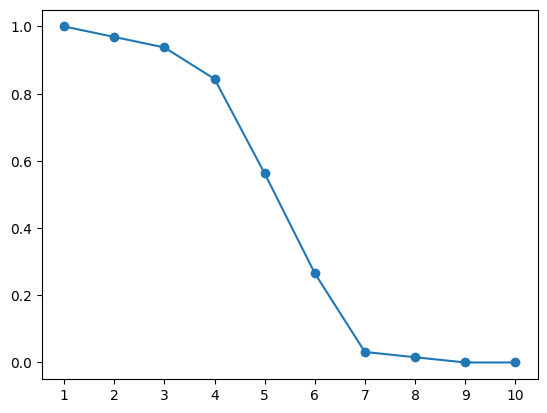

In [32]:
import matplotlib.pyplot as plt
import numpy as np
x = [i for i in range(1,11)]
plt.plot(x,f(t))
plt.xticks(np.arange(min(x), max(x)+1, 1.0)) 
plt.scatter(x,f(t))

<ErrorbarContainer object of 3 artists>

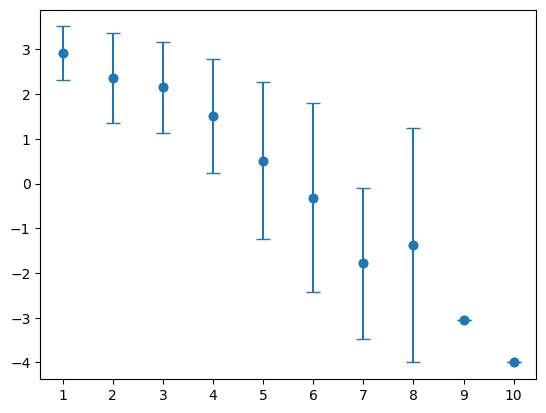

In [34]:
aa = []
sss = []
for i in t:
    if len(i) != 0:
        i = np.array(i)
        aa.append(np.mean(i))
        sss.append(np.std(i))
    else:
        aa.append(-4)
        sss.append(0)

plt.xticks(np.arange(min(x), max(x)+1, 1.0)) 
plt.scatter(x,aa)
plt.errorbar(x, aa, yerr=sss, fmt='o', capsize=5)

In [40]:
[[j for j in i if j < -3] for i in t]

[[],
 [],
 [],
 [],
 [-3.118012420833111, -3.428571395576, -3.4782608970999718],
 [-3.763975150883198,
  -3.92546583712101,
  -3.801242232322693,
  -3.552795059978962,
  -3.9999999925494194,
  -3.7515528202056885],
 [-3.913043513894081,
  -3.018633581697941,
  -3.6770186498761177,
  -4.000000037252903],
 [-4.000000007450581],
 [-3.0559006109833717],
 []]